# Fundamentals of Learning


## Supervised methods

## Unsupervised methods

## Training and Testing for supervised learning

![title](image1.png)

# Linear Regression

## simple form

\begin{align}
y = a + b x 
\end{align}

\begin{align}
Loss = \sum (y - a - b x)^ 2
\end{align}

## matrix form

\begin{align}
Y  = X \beta + e
\end{align}


![title](image2.png)

\begin{align}
Loss  = (Y - X \beta) ^ 2
\end{align}


### solution of matrix form

\begin{align}
\beta = (X^T X) ^{-1} X^T Y
\end{align}

# Homework

In [1]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
def fit_linear_regression(X, Y):
    """
    :param X: A numpy matrix, where each row is a data element (X)
    :param Y: A list of responses for each of the rows (y)
    :return: An array of parameters
    """
    polyf = PolynomialFeatures(1)
    X = polyf.fit_transform(X)
    B = np.dot(inv(np.dot(X.T, X)), np.dot(X.T, Y)), X
    return B


def fit_polynomial_regression(data_list, response_list, degree=2):
    """
    :param data_list: An array_like with data elements
    :param response_list: A list of responses for each of the rows (y)
    :param degree: degree of polynomial to use
    :return: An array of parameters
    """
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(data_list)
    B = np.dot(inv(np.dot(X.T, X)), np.dot(X.T, response_list)), X
    return B


def mean_square_loss(X, Y, b):
    """
    :param X: A numpy matrix, where each row is a data element (X)
    :param Y: A list of responses for each of the rows (y)
    :param b: An array of parameters
    :return: mean square loss is square loss per data point
    """
    return np.sum((X.dot(b) - Y)**2)/(len(Y))


def plot_test_err_vs_train_err(train_X, train_Y, test_X, test_Y):
    """
    :param train_X: A numpy matrix, where each row is a data element
    :param train_Y: A list of responses for each of the rows
    :param test_X: test set for data matrix
    :param test_Y: test set of responses for each of the rows from test_X
    should plot mean suqare loss on train and test sets versus polynomial degree
    """
    train = []
    test = []
    rng = np.arange(5)
    for degree in rng:
        beta, train_P = fit_polynomial_regression(train_X, train_Y, degree=degree)
        loss_train = mean_square_loss(train_P, train_Y, beta)
        
        poly = PolynomialFeatures(degree)
        test_P = poly.fit_transform(test_X)
        loss_test = mean_square_loss(test_P, test_Y, beta)
        
        train.append(loss_train)
        test.append(loss_test)
        
    
    plt.clf()
    plt.figure(figsize=(16,9))
    plt.plot(rng, np.log(train)/abs(np.log(train)[0]), color="yellow", label="Train Loss")
    plt.plot(rng, np.log(test)/abs(np.log(test)[0]), color="blue", label="Test Loss")
    plt.legend(loc="best")
    plt.xlabel("polynom")
    plt.ylabel("mean_error")
    plt.show()
        
    

### Test Data

In [3]:
X = np.array([[0.2*x + 0.5, 0.6*x**2] for x in np.arange(45)])

In [4]:
Y = [x.dot(np.array([1,1])) + np.random.normal(0, 1) for x in X]

### Linear Regression

In [5]:
linear_betas, X_L_F = fit_linear_regression(X, Y)

In [6]:
linear_betas

array([0.29056153, 0.83997732, 1.0013179 ])

### Polynomial Regression

In [7]:
poly_betas, X_P_F = fit_polynomial_regression(X, Y, 1)

In [8]:
poly_betas

array([0.29056153, 0.83997732, 1.0013179 ])

### Mean Square Loss

In [9]:
mean_square_loss(X_L_F, Y, linear_betas)

1.0747022085453284

In [10]:
mean_square_loss(X_P_F, Y, poly_betas)

1.0747022085453284

### Plot

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

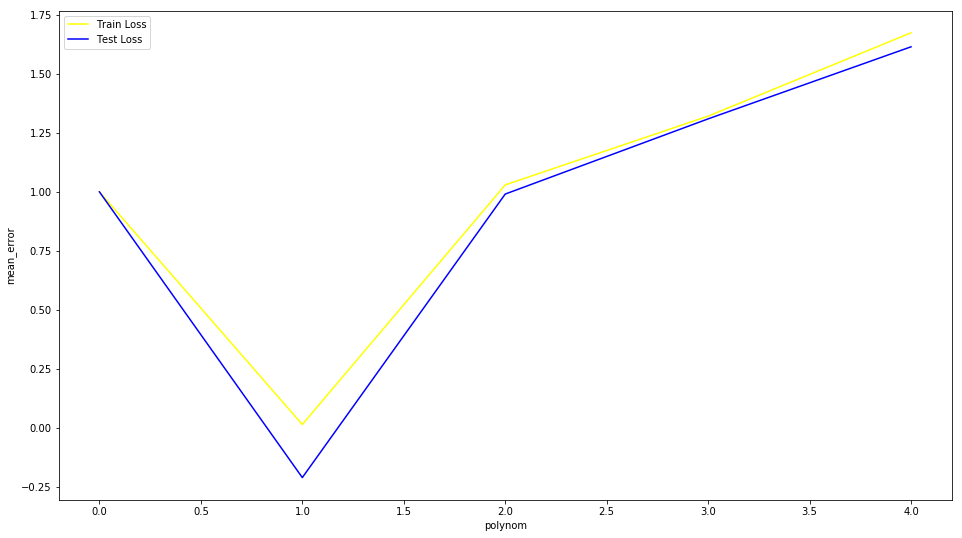

In [12]:
plot_test_err_vs_train_err(X_train, y_train, X_test, y_test)